# Area under curves

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.interpolate import interp1d

In [2]:
# Contours np.array([[x], [y]]) vectors
top_0 = np.array([[8, 8, 8, 8, 8], [8, 8, 8, 8, 8]])
top_1 = np.array([[7, 9, 9, 7, 7], [7, 7, 9, 9, 7]])
top2_goc = np.array([[6, 10, 10, 6, 6], [6, 6, 10, 10, 6]])
top3 = np.array([[5, 11, 11, 5, 5], [5, 5, 11, 11, 5]])
top4 = np.array([[4, 12, 12, 4, 4], [4, 4, 12, 12, 4]])
top5_owc = np.array([[3, 13, 13, 3, 3], [3, 3, 13, 13, 3]])
# depths of polygons
top_depths = np.array([-1200, -1250, -1380, -1500, -1590, -1720])
base_depths = top_depths - 100
# contacts
goc, owc = -1380, -1720
areas = np.array([  0.,   4.,  16.,  36.,  64., 100.])

In [3]:
def resample(x, y, maxx=100, dx=2.5):
    f = interp1d(x, y)
    xnew = np.arange(0, maxx, dx)
    ynew = f(xnew)   # use interpolation function returned by `interp1d`
    return ynew, xnew

In [4]:
top_depths = np.array([-1200, -1250, -1380, -1500, -1590, -1720])
ya = top_depths 
yb = top_depths - 100

In [5]:
y1, x_new = resample(areas, ya)
y2, x_new = resample(areas, yb)

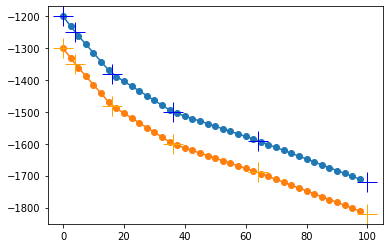

In [6]:
plt.plot(x_new, y1, 'o-')
plt.plot(x_new, y2, 'o-')
plt.plot(areas, top_depths, '+', c='b', markersize=20)
plt.plot(areas, base_depths, '+', c='orange', markersize=20)

In [7]:
top_clipped = np.clip(y1, a_max=goc, a_min=owc)
base_clipped = np.clip(y2, a_max=goc, a_min=owc)

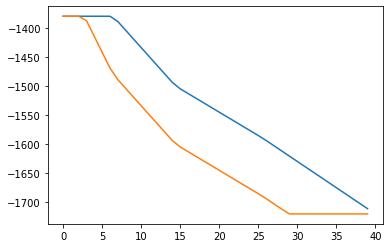

In [8]:
plt.plot(top_clipped)
plt.plot(base_clipped)

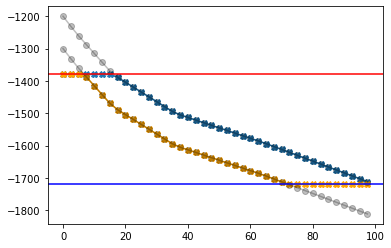

In [9]:
plt.plot(x_new, top_clipped, 'X-')
plt.plot(x_new, base_clipped, 'X-', color='orange')
plt.plot(x_new, y1, 'o-k', alpha=0.25)
plt.plot(x_new, y2, 'o-k', alpha=0.25)
plt.axhline(goc, c='r', label='GOC')
plt.axhline(owc, c='b', label='OWC')

In [10]:
diff = top_clipped - base_clipped # calculate difference
posPart = np.maximum(diff, 0) # only keep positive part, set other values to zero
pos_area = np.trapz(posPart, x_new)
pos_area

7463.715277777778

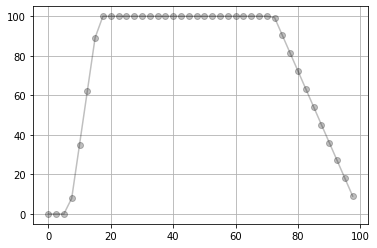

In [11]:
plt.plot(x_new, posPart, 'o-k', alpha=0.25)
plt.grid()

### TESTING

In [12]:
ya = np.array([0, -50, -100])
yb = ya - 50
goc, owc = -50, -100
areas = np.array([    0.,  5000., 10000.])

In [13]:
y1, x_new = resample(areas, ya, maxx=10000, dx=100)
y2, x_new = resample(areas, yb, maxx=10000, dx=100)

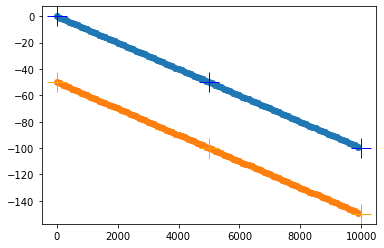

In [14]:
plt.plot(x_new, y1, 'o-')
plt.plot(x_new, y2, 'o-')
plt.plot(areas, ya, '+', c='b', markersize=20)
plt.plot(areas, yb, '+', c='orange', markersize=20)

In [15]:
top_clipped = np.clip(y1, a_max=goc, a_min=owc)
base_clipped = np.clip(y2, a_max=goc, a_min=owc)

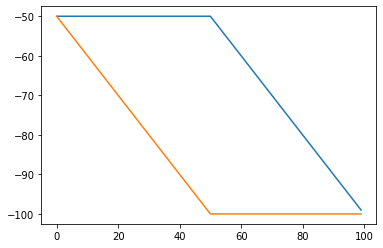

In [16]:
plt.plot(top_clipped)
plt.plot(base_clipped)

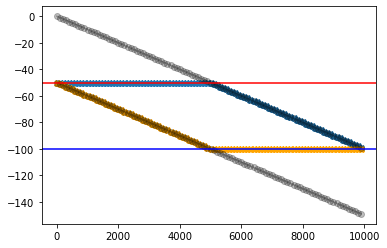

In [17]:
plt.plot(x_new, top_clipped, 'X-')
plt.plot(x_new, base_clipped, 'X-', color='orange')
plt.plot(x_new, y1, 'o-k', alpha=0.25)
plt.plot(x_new, y2, 'o-k', alpha=0.25)
plt.axhline(goc, c='r', label='GOC')
plt.axhline(owc, c='b', label='OWC')

In [18]:
diff = top_clipped - base_clipped # calculate difference
posPart = np.maximum(diff, 0) # only keep positive part, set other values to zero
pos_area = np.trapz(posPart, x_new)
pos_area

249950.0

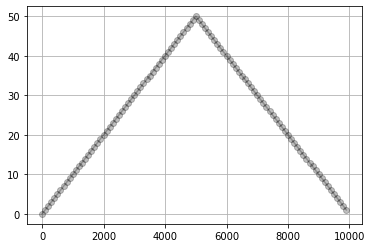

In [19]:
plt.plot(x_new, diff, 'o-k', alpha=0.25)
plt.grid()

In [20]:
np.cumsum(diff)[-1]

2500.0